   student_id    name   age  sci_marks  math_marks
0           1    jaya  18.0         68          78
1           2    maya  18.0         60          83
2           3   swati   NaN         60          69
3           4   priya  19.0         57          80
4           5   nitya  18.0         99          98
5           6    siya  20.0         45          67
6           7   radha   NaN         98          98
7           8  rambha  19.0         66          56
8           9    rutu  18.0         99          76
9          10  mansha  18.0         45          56
mising values
student_id    0
name          0
age           2
sci_marks     0
math_marks    0
dtype: int64
mising values
student_id    0
name          0
age           0
sci_marks     0
math_marks    0
dtype: int64
outlier for age
IQR for [16.875,19.875]
outlier for math_marks
IQR for [45.375,104.375]
outlier for sci_marks
IQR for [8.625,139.625]
   student_id    name     age  sci_marks  math_marks
0           1    jaya  18.000       68

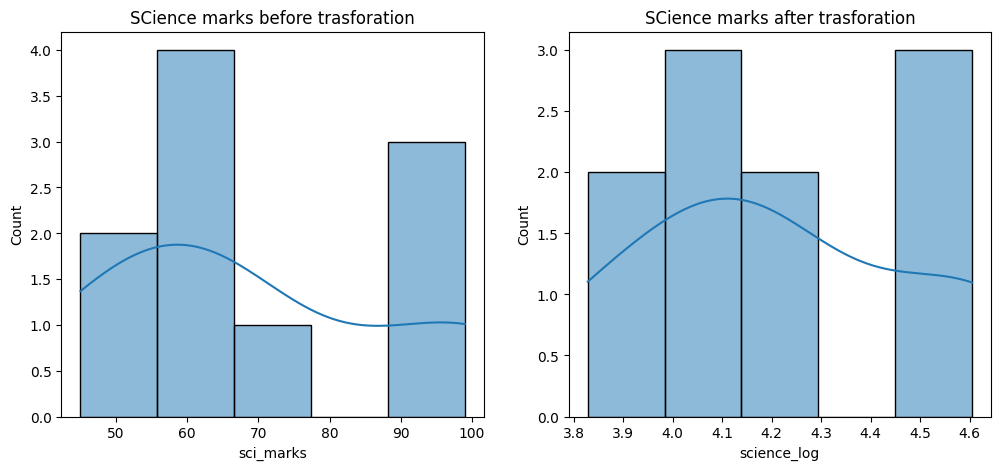

skewd value
orignal trasformation:0.55
log trasformation:0.24


<Figure size 640x480 with 0 Axes>

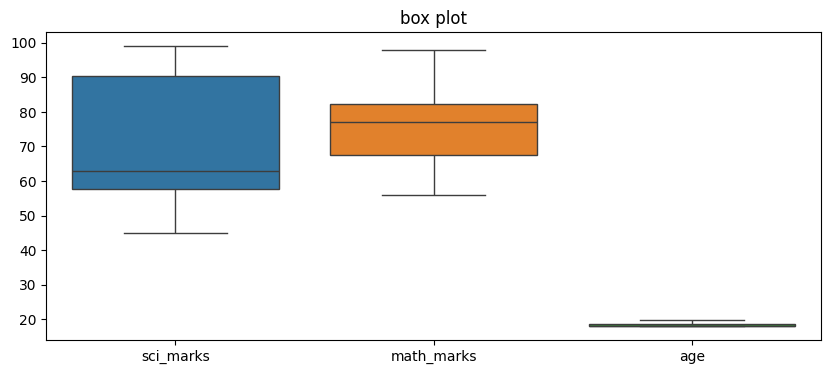

In [4]:
# !pip install pandas numpy seaborn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data={
    'student_id':[1,2,3,4,5,6,7,8,9,10],
    'name':['jaya','maya','swati','priya','nitya','siya','radha','rambha','rutu','mansha'],
    'age':[18,18,np.nan,19,18,20,np.nan,19,18,18],
    'sci_marks':[68,60,60,57,99,45,98,66,99,45],
    'math_marks':[78,83,69,80,98,67,98,56,76,56]
}
df=pd.DataFrame(data)
print(df)
print("mising values")
print(df.isnull().sum())
age_median=df['age'].median()
df=df.assign(age=df['age'].fillna(age_median))
print("mising values")
print(df.isnull().sum())

def handle_outlier(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  return df.assign(**{
      column:np.where(df[column]<lower_bound,lower_bound,np.where(df[column]>upper_bound,upper_bound,df[column]))
  })

for col in['age','math_marks','sci_marks']:
  print(f"outlier for {col}")
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  print(f"IQR for [{lower_bound},{upper_bound}]")
  df=handle_outlier(df,col)
print(df)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['sci_marks'],kde=True)
plt.title("SCience marks before trasforation")

df=df.assign(science_log=np.log(df['sci_marks']+1))

plt.subplot(1,2,2)
plt.title("SCience marks after trasforation")
sns.histplot(df['science_log'],kde=True)
plt.show()
plt.tight_layout()

print("skewd value")
print(f"orignal trasformation:{df['sci_marks'].skew():.2f}")
print(f"log trasformation:{df['science_log'].skew():.2f}")

plt.figure(figsize=(10,4))
sns.boxplot(data=df[['sci_marks','math_marks','age']])
plt.title("box plot")
plt.show()




